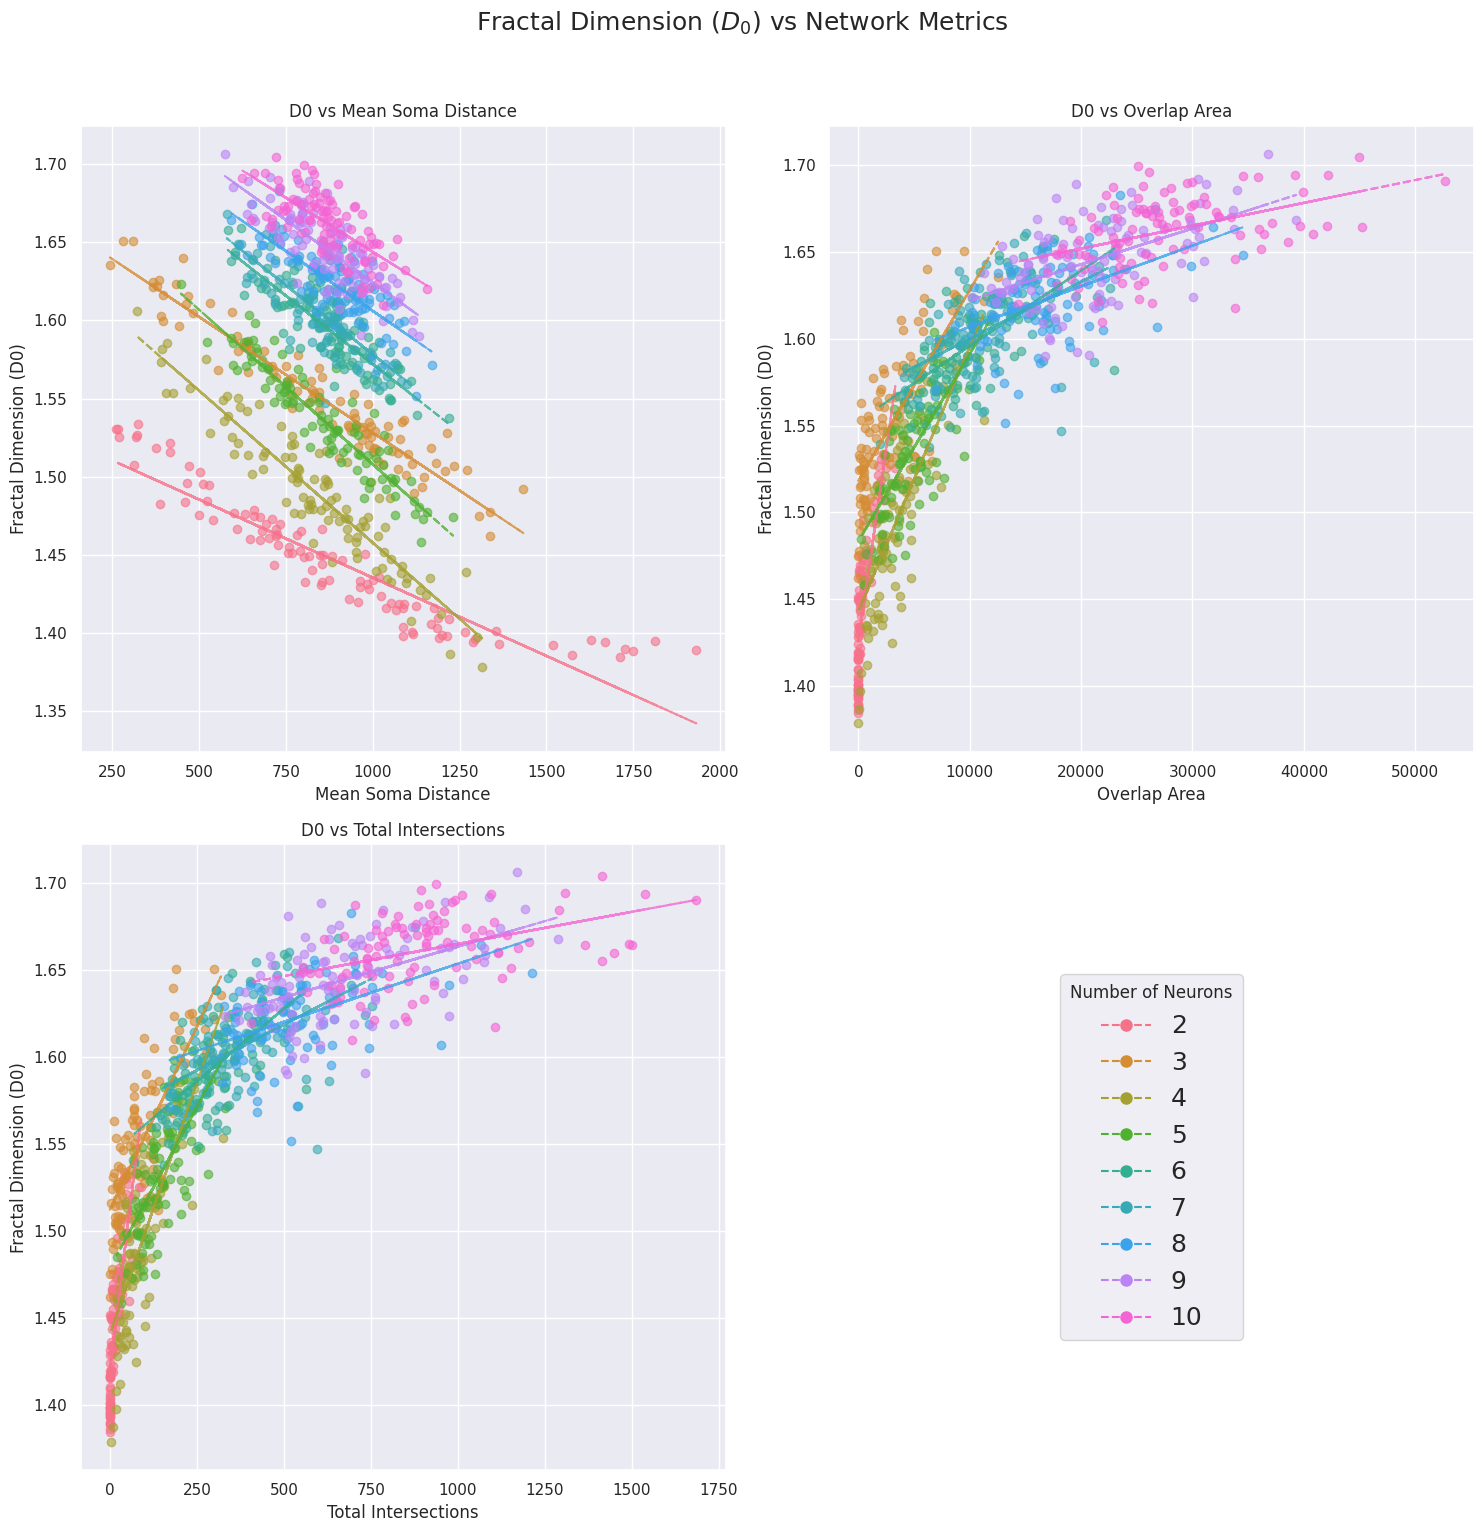

metric,Mean Soma Distance,Overlap Area,Total Intersections
n_neurons,,,
2,-0.927,0.811,0.819
3,-0.959,0.761,0.800
4,-0.932,0.761,0.759
5,-0.931,0.740,0.734
6,-0.855,0.596,0.644
7,-0.788,0.529,0.529
8,-0.786,0.489,0.476
9,-0.803,0.527,0.510
10,-0.701,0.451,0.437


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data
path = '/home/apd/Projects/FractalFluency/datasets/fractal_portfolio/branch_networks/overlap_analysis/random_positions/combined_results.csv'
df = pd.read_csv(path)

# Set up plotting style
plt.style.use('default')
sns.set_theme()

# Create a color palette that will be consistent across all plots
n_neurons_list = sorted(df['n_neurons'].unique())
colors = sns.husl_palette(n_colors=len(n_neurons_list))
color_dict = dict(zip(n_neurons_list, colors))

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle(r'Fractal Dimension $(D_0)$ vs Network Metrics', fontsize=18, y=1.02)

# List of metrics to plot against D0
metrics = [
    ('mean_soma_distance', 'Mean Soma Distance'),
    ('overlap_area', 'Overlap Area'),
    ('total_intersections', 'Total Intersections')
]

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    # Plot scatter and trend line for each n_neurons
    for n in n_neurons_list:
        subset = df[df['n_neurons'] == n]
        color = color_dict[n]
        
        # Scatter plot
        ax.scatter(subset[metric], subset['D0'], 
                  color=color, alpha=0.6, label=f'{n}')
        
        # Trend line
        z = np.polyfit(subset[metric], subset['D0'], 1)
        p = np.poly1d(z)
        ax.plot(subset[metric], p(subset[metric]), 
                color=color, alpha=0.8, linestyle='--')
    
    ax.set_title(f'D0 vs {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Fractal Dimension (D0)')
    
    # Remove individual legends
    ax.legend().remove()

# Create a single legend in the empty subplot position
legend_elements = [plt.Line2D([0], [0], marker='o', color=color_dict[n], 
                            label=f'{n}', markersize=8, linestyle='--')
                  for n in n_neurons_list]
axes[1, 1].legend(handles=legend_elements, title='Number of Neurons', 
                 loc='center', fontsize=18)
axes[1, 1].axis('off')  # Hide the axes but keep the legend

# Adjust layout
plt.tight_layout()

# Save and show plot
plt.savefig('D0_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

correlation_data = []
for n in n_neurons_list:
    subset = df[df['n_neurons'] == n]
    for metric, title in metrics:
        corr = subset[metric].corr(subset['D0'])
        correlation_data.append({
            'n_neurons': n,
            'metric': title,
            'correlation': corr
        })

corr_df = pd.DataFrame(correlation_data)

# Reshape the DataFrame to have metrics as columns and n_neurons as rows
corr_df_wide = corr_df.pivot(index='n_neurons', 
                            columns='metric', 
                            values='correlation')

# Round to 3 decimal places
corr_df_wide = corr_df_wide.round(3)

# Sort the columns alphabetically
corr_df_wide = corr_df_wide.reindex(sorted(corr_df_wide.columns), axis=1)

corr_df_wide.to_csv('D0_correlations.csv')

corr_df_wide


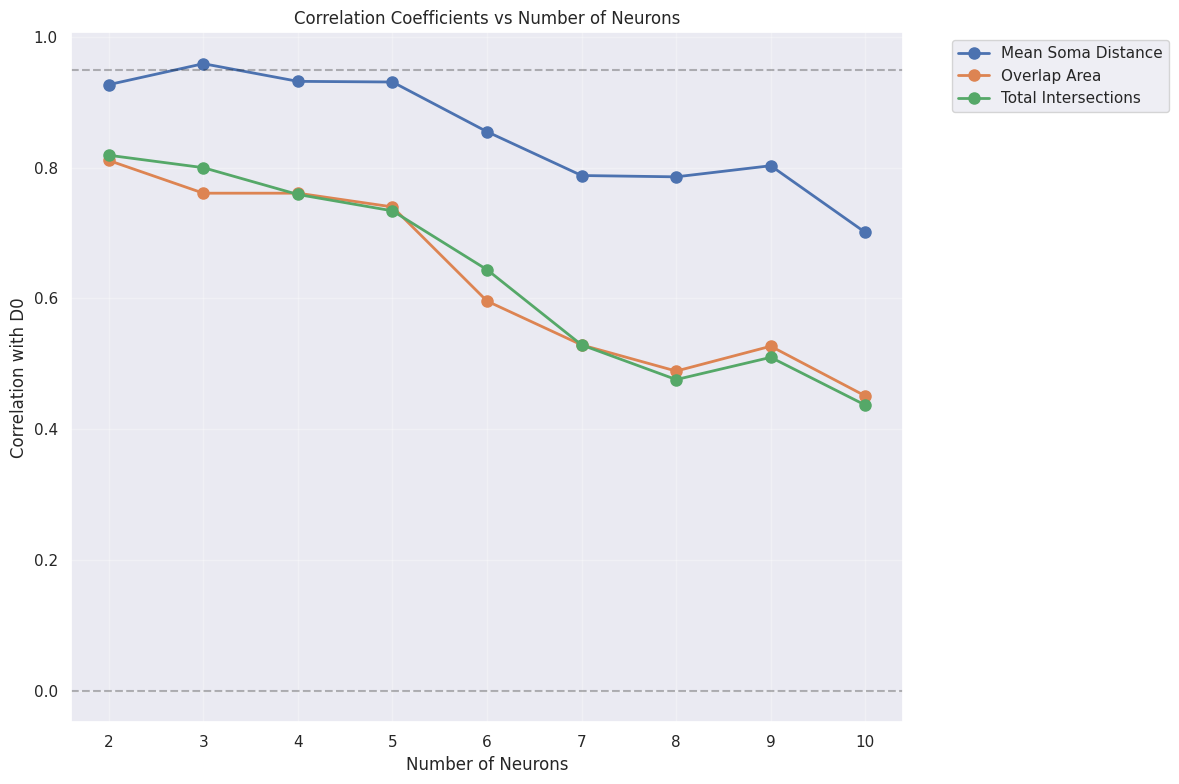

In [2]:
plt.figure(figsize=(12, 8))

for metric in corr_df_wide.columns:
    plt.plot(np.abs(corr_df_wide.index), np.abs(corr_df_wide[metric]), 
            marker='o', label=metric, linewidth=2, markersize=8)

plt.xlabel('Number of Neurons')
plt.ylabel('Correlation with D0')
plt.title('Correlation Coefficients vs Number of Neurons')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axhline(y=0.95, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('D0_correlation_trends.png', dpi=300, bbox_inches='tight')
plt.show()

corr_df_wide.to_csv('D0_correlations.csv')
